<a href="https://colab.research.google.com/github/harshitha-999/Sentiment_Analysis/blob/master/Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import seaborn as sns
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traindata = pd.read_csv('/content/drive/MyDrive/ml/train.csv')
traindata.rename(columns={'Is_Response':'Status'},inplace=True)
traindata.head()

,User_ID,Description,Browser_Used,Device_Used,Status
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Status        38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [ ]:
traindata.isna().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Status          0
dtype: int64

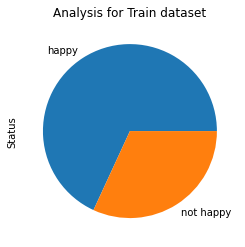

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
round(traindata.Status.value_counts(normalize=True)*100,20).plot(kind='pie')
plt.title('Analysis for Train dataset')
plt.show()

In [ ]:
traindata.shape


(38932, 5)

In [ ]:
def removing_apostrophe(text):
    text = re.sub("won't", "will not", text)
    text = re.sub("can't", "can not", text)
    text = re.sub("'t've", " not have", text)
    text = re.sub("'d've", " would have", text)
    text = re.sub("'cause", " because", text)
    text = re.sub("n't", " not", text) 
    text = re.sub("'re", " are", text)
    text = re.sub("'s", " is", text)
    text = re.sub("'d", " would", text)
    text = re.sub("'ll", " will", text)
    #text = re.sub("'t", " not", text)
    text = re.sub("'ve", " have", text)
    text = re.sub("'m", " am", text)
    return text


In [ ]:
def clean_data(text):
  text=removing_apostrophe(text)
  text = text.lower()
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = word_tokenize(text)
  return text

new = lambda x :clean_data(x)

In [ ]:
traindata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'],inplace=True)
traindata['NewDescription'] = pd.DataFrame(traindata.Description.apply(new))


In [ ]:
traindata.head(20)


,Description,Status,NewDescription
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:

nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in STOPWORDS])
traindata["NewDescription"] = traindata["NewDescription"].apply(lambda text: remove_stopwords(text))
traindata.head(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Description,Status,NewDescription
0,The room was kind of clean but had a VERY stro...,not happy,"['the', 'room', 'was', 'kind', 'of', 'clean', ..."
1,I stayed at the Crown Plaza April -- - April -...,not happy,"['i', 'stayed', 'at', 'the', 'crown', 'plaza',..."
2,I booked this hotel through Hotwire at the low...,not happy,"['i', 'booked', 'this', 'hotel', 'through', 'h..."
3,Stayed here with husband and sons on the way t...,happy,"['stayed', 'here', 'with', 'husband', 'and', '..."
4,My girlfriends and I stayed here to celebrate ...,not happy,"['my', 'girlfriends', 'and', 'i', 'stayed', 'h..."
5,We had - rooms. One was very nice and clearly ...,happy,"['we', 'had', 'rooms', 'one', 'was', 'very', '..."
6,My husband and I have stayed in this hotel a f...,not happy,"['my', 'husband', 'and', 'i', 'have', 'stayed'..."
7,My wife & I stayed in this glorious city a whi...,happy,"['my', 'wife', 'i', 'stayed', 'in', 'this', 'g..."
8,My boyfriend and I stayed at the Fairmont on a...,happy,"['my', 'boyfriend', 'and', 'i', 'stayed', 'at'..."
9,"Wonderful staff, great location, but it was de...",not happy,"['wonderful', 'staff', 'great', 'location', 'b..."


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

traindata["NewDescription"] = traindata["NewDescription"].apply(lambda text: lemmatize_words(text))
traindata.head(20)

,Description,Status,NewDescription
0,The room was kind of clean but had a VERY stro...,not happy,"['the', 'room', 'was', 'kind', 'of', 'clean', ..."
1,I stayed at the Crown Plaza April -- - April -...,not happy,"['i', 'stayed', 'at', 'the', 'crown', 'plaza',..."
2,I booked this hotel through Hotwire at the low...,not happy,"['i', 'booked', 'this', 'hotel', 'through', 'h..."
3,Stayed here with husband and sons on the way t...,happy,"['stayed', 'here', 'with', 'husband', 'and', '..."
4,My girlfriends and I stayed here to celebrate ...,not happy,"['my', 'girlfriends', 'and', 'i', 'stayed', 'h..."
5,We had - rooms. One was very nice and clearly ...,happy,"['we', 'had', 'rooms', 'one', 'was', 'very', '..."
6,My husband and I have stayed in this hotel a f...,not happy,"['my', 'husband', 'and', 'i', 'have', 'stayed'..."
7,My wife & I stayed in this glorious city a whi...,happy,"['my', 'wife', 'i', 'stayed', 'in', 'this', 'g..."
8,My boyfriend and I stayed at the Fairmont on a...,happy,"['my', 'boyfriend', 'and', 'i', 'stayed', 'at'..."
9,"Wonderful staff, great location, but it was de...",not happy,"['wonderful', 'staff', 'great', 'location', 'b..."


In [ ]:
x = traindata['NewDescription']
y = traindata['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.6,random_state =225)
                                                    

print("x_train = " ,len(x_train))
print("x_test  = " ,len(x_test))
print("y_train = " ,len(y_train))
print("y_test  = " ,len(y_test))


x_train =  15572
x_test  =  23360
y_train =  15572
y_test  =  23360


 **Model Training**

In [ ]:
print(x_train)

24146    ['this', 'is', 'an', 'older', 'property', 'tha...
22172    ['this', 'hotel', 'is', 'really', 'a', 'nightm...
31963    ['absolute', 'gem', 'of', 'a', 'place', 'which...
29848    ['myself', 'friends', 'all', 'in', 'our', 'mid...
12531    ['the', 'drury', 'plaza', 'hotel', 'riverwalk'...
                               ...                        
7519     ['i', 'spent', 'a', 'week', 'here', 'and', 'th...
30765    ['i', 'am', 'frequently', 'in', 'denver', 'whe...
29870    ['it', 'is', 'unclear', 'how', 'anyone', 'rate...
26912    ['my', 'wife', 'and', 'i', 'stayed', 'at', 'th...
24227    ['overall', 'this', 'is', 'a', 'good', 'hotel'...
Name: NewDescription, Length: 15572, dtype: object


In [ ]:
tvec = TfidfVectorizer()
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
model = Pipeline([('vectorizer', tvec), ('classifier', clf)])

In [ ]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:


from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy = " ,accuracy_score(y_pred, y_test))


Accuracy =  0.8773972602739726


In [ ]:
print("Precision = ", precision_score(y_pred, y_test, average="weighted"))

Precision =  0.8870193082401084


In [ ]:

print("Recall =  ", recall_score(y_pred, y_test, average="weighted"))

Recall =   0.8773972602739726


In [ ]:

example = ["I am  not happy"]
result=model.predict(example)
print(result)

['not happy']


In [ ]:
from sklearn.metrics import confusion_matrix

r = confusion_matrix(y_test, y_pred)
print(r)

[[14963   889]
 [ 1975  5533]]


In [ ]:

with open('senti.pkl','wb') as f:
    pickle.dump(model,f)
  
lr_model = pickle.load(open('senti.pkl','rb'))
 
lr_model.predict(["I am  sad"])[0]

'not happy'